In [1]:
#!pip install citipy

In [18]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
# Import api key
from config import api_key
# Import citipy for city names by long. and lat.
from citipy import citipy

In [19]:
# Define ranges for longitude and latitude
latitude_range = (-90,90)
longitude_range = (-180,180)

In [35]:
# Create lists for coordinates and cities
lat_long_coord = []
cities = []

# Create random latitude and longitude combinations - 1500 at the end
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=10)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=10)
lat_long_coord = zip(latitude, longitude)

# Build a for loop to find city names for random coordinates
for lat_long in lat_long_coord:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    # Add the city to a list if it is unique
    if city not in cities:
        cities.append(city)

In [36]:
# Check length of the list
len(cities)
#print(cities)

10

In [37]:
# Create base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
# define units
units = "imperial"

# Build query url with units
query_url = f"{base_url}&units={units}&q="

In [38]:
# Create lists for results
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_reduced = []
latitude_reduced = []
longitude_reduced = []

In [39]:
# Loop through cities to find results
index = 0

for city in cities:
    
    # Create url for city
    full_url = f"{query_url}{city}"
    index += 1
    
    try:
    # Find json response for city
        response = requests.get(full_url).json()
        city_number = response["id"]
        
        # Find data to append for each city
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        
         # Print text about: Append results
        print(f"City {index} of {len(cities)}: {city} found. City Number: {city_number}. Appending results.")
        
        # Append all results
        cities_reduced.append(city)
        latitude_reduced.append(lat)
        longitude_reduced.append(long)
        temperature.append(temp_max)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        countries.append(country)
        dates.append(weather_date)
        
        
    except KeyError:
        print(f"{city} not found.")
        

City 1 of 10: qaanaaq found. City Number: 3831208. Appending results.
City 2 of 10: puerto madero found. City Number: 3520989. Appending results.
City 3 of 10: baghdad found. City Number: 98182. Appending results.
City 4 of 10: butaritari found. City Number: 2110227. Appending results.
City 5 of 10: albany found. City Number: 5106841. Appending results.
City 6 of 10: dikson found. City Number: 1507390. Appending results.
City 7 of 10: vardo found. City Number: 777019. Appending results.
City 8 of 10: mataura found. City Number: 6201424. Appending results.
City 9 of 10: hualmay found. City Number: 3939761. Appending results.
City 10 of 10: souillac found. City Number: 933995. Appending results.


In [42]:
# Create DataFrame from series
weather_data = pd.DataFrame({
    "City": cities_reduced,
    "Latitude": latitude_reduced,
    "Longitude": longitude_reduced,
    "Max Temp.": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})
#weather_data = pd.DataFrame(weather_data)


In [53]:
# Convert Unix timestamp to readable date using datetime module
from datetime import datetime

weather_data["Date Converted"] = pd.to_datetime(weather_data["Date"], unit='s')

In [54]:
weather_data

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date,Date Converted
0,qaanaaq,77.4840,-69.3632,7.92,78,100,6.67,GL,1618863353,2021-04-19 20:15:53
1,puerto madero,14.7208,-92.4215,91.40,49,20,12.66,MX,1618863590,2021-04-19 20:19:50
2,baghdad,33.3406,44.4009,84.20,28,0,9.22,IQ,1618863591,2021-04-19 20:19:51
3,butaritari,3.0707,172.7902,83.05,75,91,13.71,KI,1618863591,2021-04-19 20:19:51
4,albany,42.6001,-73.9662,60.01,44,100,4.63,US,1618863558,2021-04-19 20:19:18
5,dikson,73.5069,80.5464,-4.31,96,16,7.99,RU,1618863352,2021-04-19 20:15:52
6,vardo,70.3705,31.1107,41.00,52,0,18.41,NO,1618863592,2021-04-19 20:19:52
7,mataura,-46.1927,168.8643,43.70,89,0,3.44,NZ,1618863514,2021-04-19 20:18:34
8,hualmay,-11.0964,-77.6139,73.13,71,64,10.45,PE,1618863593,2021-04-19 20:19:53
9,souillac,-20.5167,57.5167,77.00,94,75,10.22,MU,1618863519,2021-04-19 20:18:39


In [63]:
# Output dataframe to csv
weather_data.to_csv("./OutputData/cities_weather_data.csv", encoding="utf-8", index=False)

In [68]:
# Bring dataframe back in
weather_data_df = pd.read_csv("./OutputData/cities_weather_data.csv")

# Remove Unix Timestamp
weather_data_df = weather_data_df[["City", "Latitude", "Longitude", "Max Temp.", "Humidity", "Cloudiness",
                                  "Wind Speed", "Country", "Date Converted"]]
# Rename column
weather_data_df = weather_data_df.rename(columns = {"Date Converted": "Date"})

weather_data_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,7.92,78,100,6.67,GL,2021-04-19 20:15:53
1,puerto madero,14.7208,-92.4215,91.40,49,20,12.66,MX,2021-04-19 20:19:50
2,baghdad,33.3406,44.4009,84.20,28,0,9.22,IQ,2021-04-19 20:19:51
3,butaritari,3.0707,172.7902,83.05,75,91,13.71,KI,2021-04-19 20:19:51
4,albany,42.6001,-73.9662,60.01,44,100,4.63,US,2021-04-19 20:19:18
5,dikson,73.5069,80.5464,-4.31,96,16,7.99,RU,2021-04-19 20:15:52
6,vardo,70.3705,31.1107,41.00,52,0,18.41,NO,2021-04-19 20:19:52
7,mataura,-46.1927,168.8643,43.70,89,0,3.44,NZ,2021-04-19 20:18:34
8,hualmay,-11.0964,-77.6139,73.13,71,64,10.45,PE,2021-04-19 20:19:53
9,souillac,-20.5167,57.5167,77.00,94,75,10.22,MU,2021-04-19 20:18:39


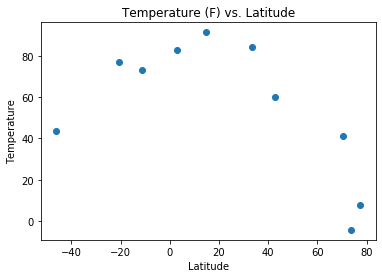

In [73]:
# Create Scatter Plot for Temp vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp."], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")
plt.show()

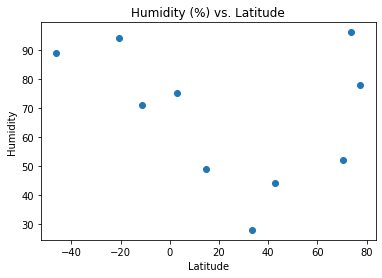

In [76]:
# Create Scatter Plot for Humidity vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")
plt.show()

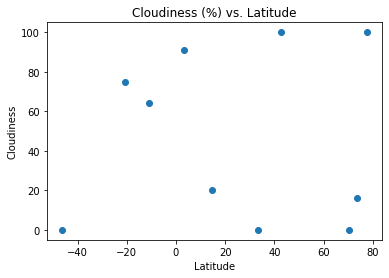

In [78]:
# Create Scatter Plot for Cloudiness vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")
plt.show()

In [ ]:
# Create Scatter Plot for Wind Speed vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()